Libraries

In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
from matplotlib.pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm  
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


from statsmodels.tsa.arima_model import ARIMA

In [4]:
#Read data
ts = pd.read_csv('/Users/simon/Desktop/$Uni Unterlagen/Uzh Skirptz/FS22/EOS403/project/Velo-Zueri-Unfaelle/data/2021_verkehrszaehlungen_werte_fussgaenger_velo.csv')

1: First, we will conduct an EDA on all three data-sets to get a feeling for the data


In [6]:
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178570 entries, 0 to 1178569
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   FK_ZAEHLER   1178570 non-null  object 
 1   FK_STANDORT  1178570 non-null  int64  
 2   DATUM        1178570 non-null  object 
 3   VELO_IN      704810 non-null   float64
 4   VELO_OUT     600754 non-null   float64
 5   FUSS_IN      473760 non-null   float64
 6   FUSS_OUT     473760 non-null   float64
 7   OST          1178570 non-null  int64  
 8   NORD         1178570 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 80.9+ MB


,FK_ZAEHLER,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
0,U15G3063865,1357,2021-01-01T00:00,NaN,NaN,20.0,0.0,2682973,1246329
1,ECO09113499,3927,2021-01-01T00:00,0.0,3.0,NaN,NaN,2682873,1245891
2,U15G3063867,1358,2021-01-01T00:00,NaN,NaN,4.0,1.0,2683557,1251702
3,U15G3063869,3011,2021-01-01T00:00,NaN,NaN,0.0,5.0,2682978,1248744
4,YSH18065716,3279,2021-01-01T00:00,NaN,NaN,9.0,4.0,2683437,1247199


In [7]:
ts.describe()

,FK_STANDORT,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
count,1.178570e+06,704810.000000,600754.000000,473760.000000,473760.000000,1.178570e+06,1.178570e+06
mean,2.540828e+03,8.158380,5.600617,14.910385,11.850203,2.682510e+06,1.248716e+06
std,1.135860e+03,12.287068,7.919064,23.198232,18.586651,1.146152e+03,2.073100e+03
min,2.000000e+01,0.000000,0.000000,0.000000,0.000000,2.679339e+06,1.244140e+06
25%,1.692000e+03,0.000000,0.000000,1.000000,0.000000,2.682171e+06,1.247199e+06
50%,2.989000e+03,4.000000,3.000000,6.000000,4.000000,2.682756e+06,1.248451e+06
75%,3.012000e+03,11.000000,8.000000,19.000000,16.000000,2.683437e+06,1.250304e+06
max,4.243000e+03,384.000000,274.000000,575.000000,336.000000,2.684578e+06,1.253280e+06


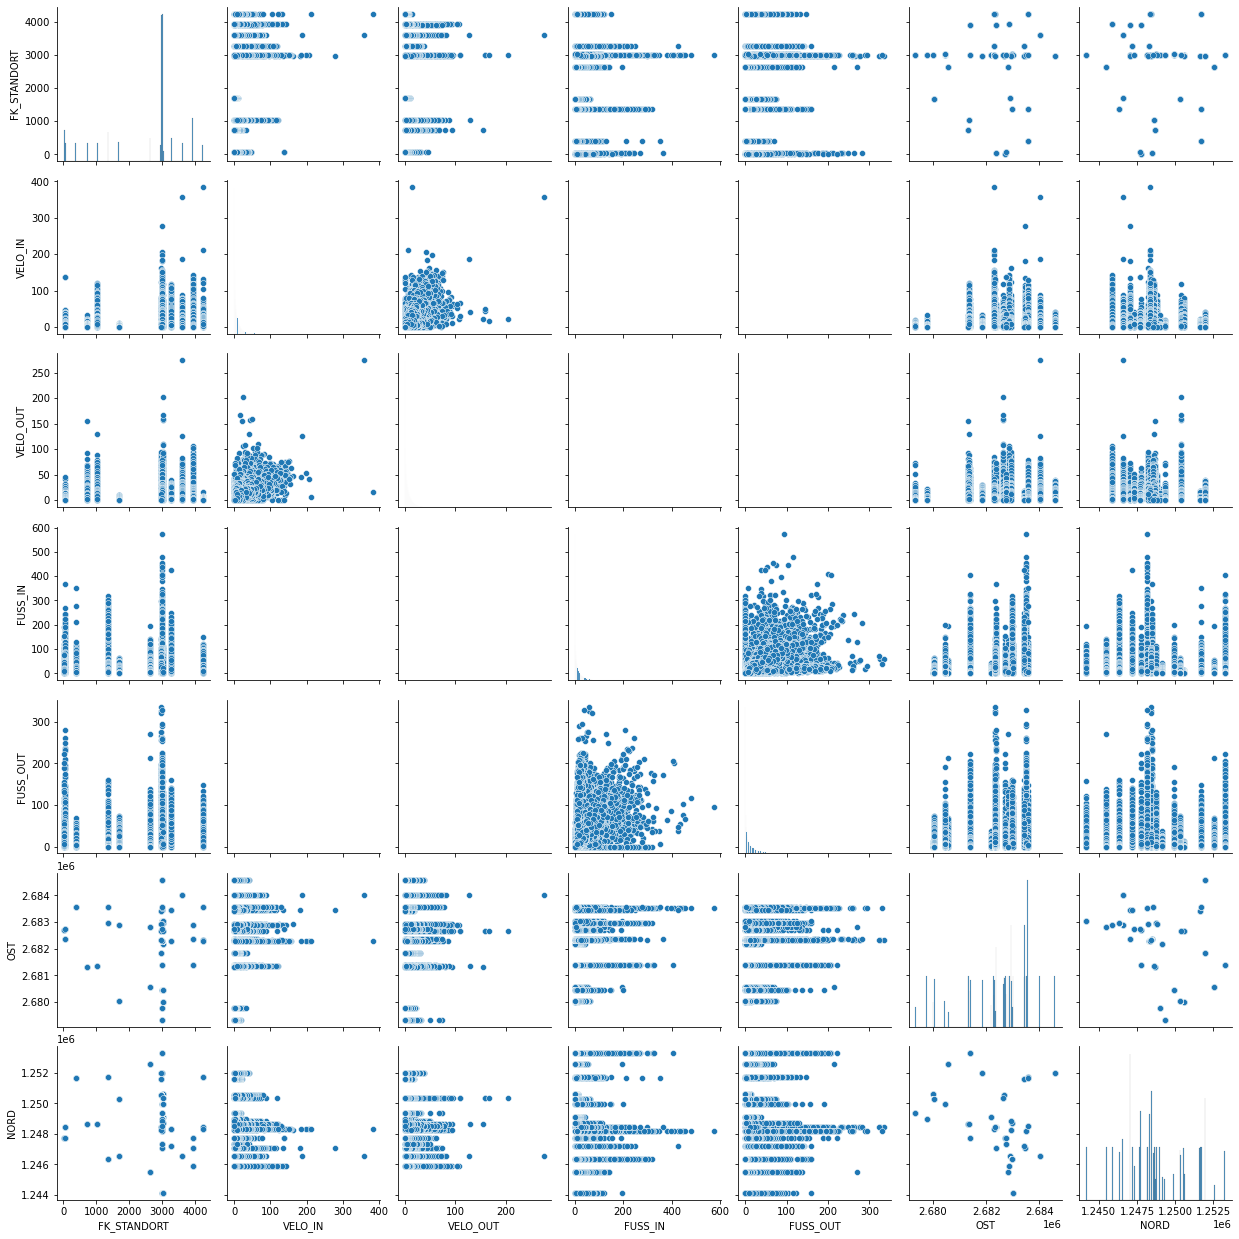

In [9]:
sns.pairplot(ts)

2: We segment the bicycle path network into nodes and edges


3: Then all accidents get attributed to the spatially closest edge
Accidents get also attributed by severity of the accident (categories already set by raw data)

4: Then, accidents normalized by the closest (determined via Voronoi tessellation) counting station value. 
The resulting graph of safety-weighted edges has an x, y and t (Lat, Long and Daytime) dimension. 

5: We will then use this graph to train a model (Maybe SVM, GCN or we will see what the lecture brings us).
The model should then be capable to predict the safety of any rout at any time in Zurich

BONUS:

If time allows it, we will also introduce the following features:
Weather data (to introduce an additional dimension, like dry, wet & frozen)
Topography (to introduce an additional weighting criteria: steepness of the segments) 
Connect our model to an actual routing engine (which uses travel time for costing of the edges)